### Desafío - Expansiones basales
- Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
  - El desafío se debe desarrollar de manera Individual.
  - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Expansiones basales.

### Descripción
- Una aplicación interesante de los modelos predictivos es poder predecir propiedades
de materiales compuestos a partir de diferentes combinaciones en el proceso y
creación de estos.
- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de
materiales con los que se hace la mezcla de concreto.
- Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir
fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que
buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza
compresiva.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere
estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de
las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la
librería pyGAM.



In [ ]:
# Instalacion de librerias especialisadas en analicis exploratorio y descripcion de datos
#!pip install ipywidgets
#!pip install pandas-profiling

In [16]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graficos seaborn, plotly y tratamiento de warnings
import seaborn as sns
import plotly.express as px
import warnings

# Analicis exploratorio y descriptivo
from pandas_profiling import ProfileReport

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, s

# Modulo de funciones especiales y graficos
import func as gfx

# Otras librerias, configuraciones e instancias
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('Datasets/compresive_strength_concrete.csv')
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                     540.00   
1                                     540.00   
2                                     332.50   
3                                     332.50   
4                                     198.60   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                               0.00       
1                                               0.00       
2                                             142.50       
3                                             142.50       
4                                             132.40       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                        0.00   
1                                        0.00   
2                                        0.00   
3                                        0.00   
4                                        0.00   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                     162.00   
1                                     162.00   
2                                     228.00   
3                                     228.00   
4                                     192.00   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                               2.50     
1                                               2.50     
2                                               0.00     
3                                               0.00     
4                                               0.00     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                            1040.00      
1                                            1055.00      
2                                             932.00      
3                                             932.00      
4                                             978.40      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                             676.00         28   
1                                             676.00         28   
2                                             594.00        270   
3                                             594.00        365   
4                                             825.50        360   

   Concrete compressive strength(MPa, megapascals)   
0                                             79.99  
1                                             61.89  
2                                             40.27  
3                                             41.05  
4                                             44.30

### Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de Concrete compressive strength(MPa,
megapascals)
- Los nombres de las variables son muy poco amigables, dado que contienen
espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se
obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y
distribución. Decide si es necesario normalizarlos/escalarlos.


In [3]:
# Limpieza de cararcteres en nombre de las variables
df.columns = df.columns.map(lambda x: str(x).lower().replace(' ', '_'))
df.columns = df.columns.map(lambda x: str(x).lower().replace('(', ''))
df.columns = df.columns.map(lambda x: str(x).lower().replace(')', ''))
df.head()

cement_component_1kg_in_a_m^3_mixture  \
0                                 540.00   
1                                 540.00   
2                                 332.50   
3                                 332.50   
4                                 198.60   

   blast_furnace_slag_component_2kg_in_a_m^3_mixture  \
0                                               0.00   
1                                               0.00   
2                                             142.50   
3                                             142.50   
4                                             132.40   

   fly_ash_component_3kg_in_a_m^3_mixture  \
0                                    0.00   
1                                    0.00   
2                                    0.00   
3                                    0.00   
4                                    0.00   

   water__component_4kg_in_a_m^3_mixture  \
0                                 162.00   
1                                 162.00   
2                                 228.00   
3                                 228.00   
4                                 192.00   

   superplasticizer_component_5kg_in_a_m^3_mixture  \
0                                             2.50   
1                                             2.50   
2                                             0.00   
3                                             0.00   
4                                             0.00   

   coarse_aggregate__component_6kg_in_a_m^3_mixture  \
0                                           1040.00   
1                                           1055.00   
2                                            932.00   
3                                            932.00   
4                                            978.40   

   fine_aggregate_component_7kg_in_a_m^3_mixture  age_day  \
0                                         676.00       28   
1                                         676.00       28   
2                                         594.00      270   
3                                         594.00      365   
4                                         825.50      360   

   concrete_compressive_strengthmpa,_megapascals_  
0                                           79.99  
1                                           61.89  
2                                           40.27  
3                                           41.05  
4                                           44.30

In [4]:
# Cambio de nombres a variables
df = df.rename(columns={'cement_component_1kg_in_a_m^3_mixture':'cement',
                        'blast_furnace_slag_component_2kg_in_a_m^3_mixture':'blast_furnace',
                        'fly_ash_component_3kg_in_a_m^3_mixture':'fly_ash',
                        'water__component_4kg_in_a_m^3_mixture':'water',
                        'superplasticizer_component_5kg_in_a_m^3_mixture':'superplasticizer',
                        'coarse_aggregate__component_6kg_in_a_m^3_mixture':'coarse_aggregate',
                        'fine_aggregate_component_7kg_in_a_m^3_mixture':'fine_aggregate',
                        'age_day':'age',
                        'concrete_compressive_strengthmpa,_megapascals_':'concrete'})

df.head()

cement  blast_furnace  fly_ash  water  superplasticizer  coarse_aggregate  \
0  540.00           0.00     0.00 162.00              2.50           1040.00   
1  540.00           0.00     0.00 162.00              2.50           1055.00   
2  332.50         142.50     0.00 228.00              0.00            932.00   
3  332.50         142.50     0.00 228.00              0.00            932.00   
4  198.60         132.40     0.00 192.00              0.00            978.40   

   fine_aggregate  age  concrete  
0          676.00   28     79.99  
1          676.00   28     61.89  
2          594.00  270     40.27  
3          594.00  365     41.05  
4          825.50  360     44.30

In [5]:
# Inspeccion de el tipo de datos
df.dtypes

cement              float64
blast_furnace       float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age                   int64
concrete            float64
dtype: object

In [6]:
print(f'''La base de datos se compone de las siguientes observaciones
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

La base de datos se compone de las siguientes observaciones
Numero de filas: 1030
Numero de columnas: 9


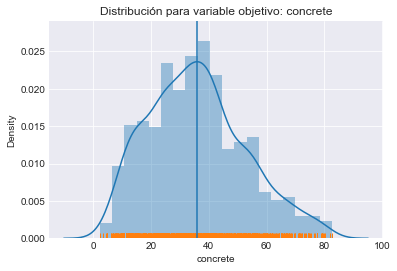

In [7]:
# Visualizacion distribucion vector objetivo
sns.distplot(x = df['concrete'])
sns.rugplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: concrete')
plt.axvline(df['concrete'].mean())
plt.show()

In [8]:
profile = ProfileReport(df, title="Reporte Pandas-Profiling para compresive_strength_concrete.csv dataset")

In [9]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gfx.summary_drop(df)

tipo  nulos  nulos_porces  ceros  ceros_porces   count  \
age                 int64      0          0.00      0          0.00 1030.00   
cement            float64      0          0.00      0          0.00 1030.00   
blast_furnace     float64      0          0.00    471          0.46 1030.00   
fly_ash           float64      0          0.00    566          0.55 1030.00   
water             float64      0          0.00      0          0.00 1030.00   
superplasticizer  float64      0          0.00    379          0.37 1030.00   
coarse_aggregate  float64      0          0.00      0          0.00 1030.00   
fine_aggregate    float64      0          0.00      0          0.00 1030.00   
concrete          float64      0          0.00      0          0.00 1030.00   

                   mean    std    min    25%    50%     75%     max  dist_IQR  \
age               45.66  63.17   1.00   7.00  28.00   56.00  365.00     49.00   
cement           281.17 104.51 102.00 192.38 272.90  350.00  540.00    157.62   
blast_furnace     73.90  86.28   0.00   0.00  22.00  142.95  359.40    142.95   
fly_ash           54.19  64.00   0.00   0.00   0.00  118.30  200.10    118.30   
water            181.57  21.35 121.80 164.90 185.00  192.00  247.00     27.10   
superplasticizer   6.20   5.97   0.00   0.00   6.40   10.20   32.20     10.20   
coarse_aggregate 972.92  77.75 801.00 932.00 968.00 1029.40 1145.00     97.40   
fine_aggregate   773.58  80.18 594.00 730.95 779.50  824.00  992.60     93.05   
concrete          35.82  16.71   2.33  23.71  34.45   46.14   82.60     22.43   

                  limit_inf  limit_sup  outliers  
age                  -66.50     129.50        59  
cement               -44.06     586.44         0  
blast_furnace       -214.42     357.38         2  
fly_ash             -177.45     295.75         0  
water                124.25     232.65         9  
superplasticizer     -15.30      25.50        10  
coarse_aggregate     785.90    1175.50         0  
fine_aggregate       591.38     963.57         5  
concrete              -9.93      79.77         4

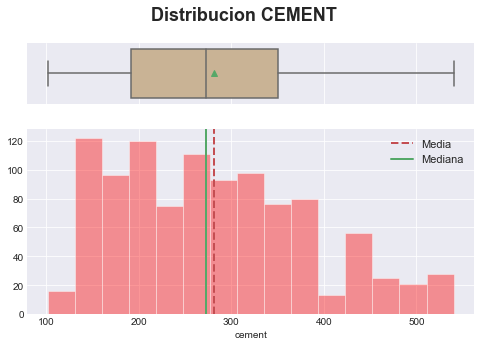

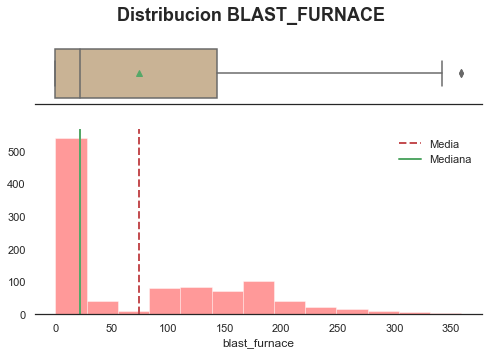

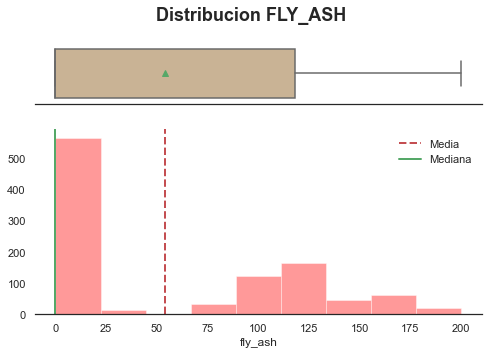

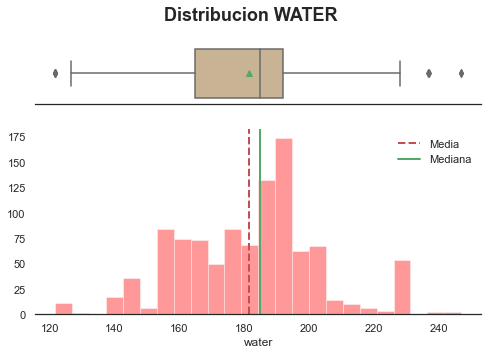

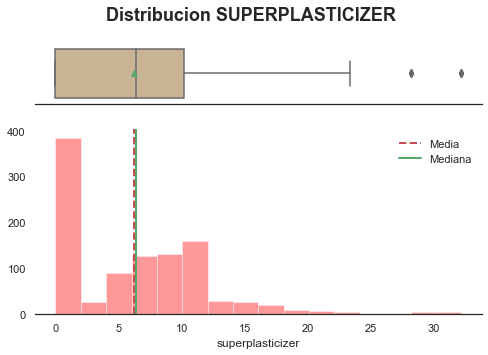

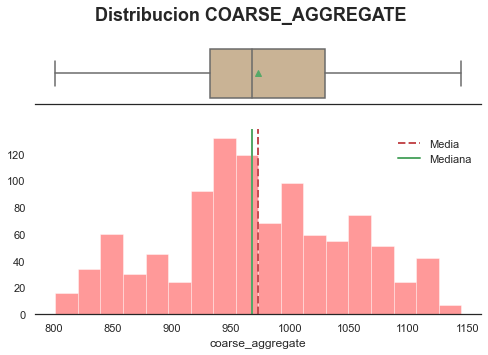

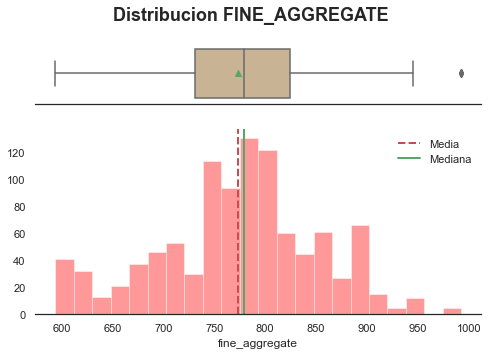

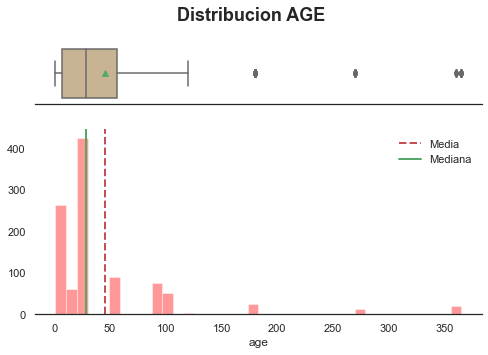

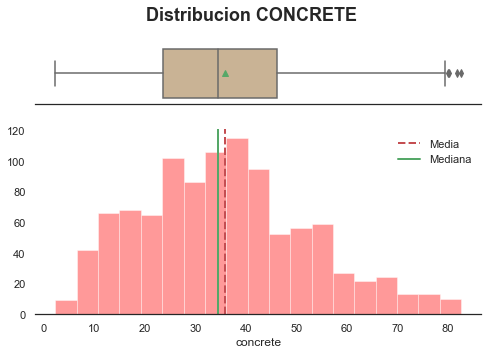

In [11]:
name_vars = ['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete']

for i in range(len(name_vars)):
        gfx.dist_box(df[name_vars[i]])

### Extra para escojer un buen modelo

In [12]:
# Separamos la matriz de atributos del vector objetivo
df_lazy = df[['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']]

X_train_pre, X_test_pre, y_train, y_test = train_test_split(df_lazy, df['concrete'], test_size = .33, random_state = 15820)
# Ajustamos el estandarizador al conjunto de entrrenamiento
scaler = StandardScaler().fit(X_train_pre)

# Con el estandarizador ajustado sobre el conjunto de entrenamiento, transformamos el conjunto de entrenamiento
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)

In [13]:
multiple_ML_models = LazyRegressor(verbose = 0, ignore_warnings = True, predictions=True)
models, predictions = multiple_ML_models.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:08<00:00,  4.82it/s]


In [14]:
models

Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LGBMRegressor                                0.92       0.92   4.64   
HistGradientBoostingRegressor                0.92       0.92   4.73   
XGBRegressor                                 0.92       0.92   4.77   
ExtraTreesRegressor                          0.90       0.91   5.15   
RandomForestRegressor                        0.90       0.90   5.26   
BaggingRegressor                             0.90       0.90   5.34   
GradientBoostingRegressor                    0.89       0.89   5.54   
DecisionTreeRegressor                        0.80       0.80   7.45   
AdaBoostRegressor                            0.78       0.79   7.78   
ExtraTreeRegressor                           0.78       0.78   7.80   
KNeighborsRegressor                          0.65       0.66   9.84   
HuberRegressor                               0.63       0.63  10.16   
LinearSVR                                    0.62       0.63  10.17   
SGDRegressor                                 0.62       0.63  10.20   
BayesianRidge                                0.62       0.63  10.20   
ElasticNetCV                                 0.62       0.63  10.20   
RidgeCV                                      0.62       0.63  10.21   
Ridge                                        0.62       0.63  10.21   
LassoCV                                      0.62       0.63  10.21   
LassoLarsIC                                  0.62       0.63  10.21   
LassoLarsCV                                  0.62       0.63  10.21   
Lars                                         0.62       0.63  10.21   
LinearRegression                             0.62       0.63  10.21   
TransformedTargetRegressor                   0.62       0.63  10.21   
LarsCV                                       0.61       0.62  10.31   
OrthogonalMatchingPursuitCV                  0.59       0.60  10.59   
PoissonRegressor                             0.58       0.59  10.72   
SVR                                          0.58       0.59  10.73   
Lasso                                        0.56       0.57  11.05   
NuSVR                                        0.55       0.56  11.13   
PassiveAggressiveRegressor                   0.55       0.56  11.19   
RANSACRegressor                              0.51       0.52  11.62   
MLPRegressor                                 0.48       0.49  11.99   
ElasticNet                                   0.47       0.49  12.04   
TweedieRegressor                             0.42       0.43  12.68   
GammaRegressor                               0.41       0.42  12.76   
OrthogonalMatchingPursuit                    0.26       0.27  14.32   
QuantileRegressor                           -0.02      -0.00  16.80   
DummyRegressor                              -0.03      -0.00  16.83   
LassoLars                                   -0.03      -0.00  16.83   
KernelRidge                                 -4.11      -3.99  37.52   
GaussianProcessRegressor                  -770.93    -752.72 461.14   

                               Time Taken  
Model                                      
LGBMRegressor                        0.05  
HistGradientBoostingRegressor        0.29  
XGBRegressor                         0.08  
ExtraTreesRegressor                  0.13  
RandomForestRegressor                0.20  
BaggingRegressor                     0.02  
GradientBoostingRegressor            0.08  
DecisionTreeRegressor                0.01  
AdaBoostRegressor                    0.07  
ExtraTreeRegressor                   0.01  
KNeighborsRegressor                  0.01  
HuberRegressor                       0.01  
LinearSVR                            0.01  
SGDRegressor                         0.01  
BayesianRidge                        0.01  
ElasticNetCV                         0.04  
RidgeCV                              0.00  
Ridge                                0.01  
LassoCV                   

In [15]:
predictions.head()

AdaBoostRegressor  BaggingRegressor  BayesianRidge  DecisionTreeRegressor  \
0              60.68             65.91          47.16                  66.82   
1              31.74             35.94          28.90                  38.50   
2              20.86             14.94          20.87                  13.52   
3              43.50             46.99          51.65                  55.90   
4              48.07             44.55          39.16                  43.94   

   DummyRegressor  ElasticNet  ElasticNetCV  ExtraTreeRegressor  \
0           36.17       43.02         47.02               66.82   
1           36.17       31.09         28.80               38.50   
2           36.17       30.32         21.76               15.62   
3           36.17       45.24         51.39               55.90   
4           36.17       38.96         39.42               43.94   

   ExtraTreesRegressor  GammaRegressor  ...  RANSACRegressor  \
0                63.80           40.18  ...            58.80   
1                31.97           30.58  ...            30.15   
2                15.43           30.09  ...            15.02   
3                55.90           42.42  ...            60.08   
4                45.15           36.77  ...            38.08   

   RandomForestRegressor  Ridge  RidgeCV  SGDRegressor   SVR  \
0                  63.86  47.23    47.23         47.08 53.35   
1                  33.16  28.97    28.97         28.82 29.07   
2                  15.54  20.36    20.36         21.26 27.80   
3                  50.53  51.80    51.80         51.72 53.75   
4                  45.46  39.02    39.02         39.34 40.22   

   TransformedTargetRegressor  TweedieRegressor  XGBRegressor  LGBMRegressor  
0                       47.28             41.74         69.33          69.46  
1                       29.01             31.56         35.98          35.75  
2                       20.03             31.67         15.14          14.50  
3                       51.90             44.10         55.49          54.09  
4                       38.93             38.63         43.93          44.94  

[5 rows x 42 columns]

In [17]:
fig = px.line(predictions)
fig.show()

### Ejercicio 3: Modelo
- En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional
a esto, importe las métricas de desempeño asociadas.

- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper
parámetro lam así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando gridsearch en lambda con un
logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de
desempeño.


In [18]:
# Se escojen variables significativas al azar segun muentras del analisis exploratorio
sub = df[['cement', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'blast_furnace']]

In [19]:
# Dividimos en conjunto de entrenamiento y validacion respecto al vector objetivo
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['concrete'], test_size = .33, random_state = 15820)

# Ajustamos el estandarizador al conjunto de entrrenamiento
scaler = StandardScaler().fit(X_train_pre)

In [20]:
# Con el estandarizador ajustado sobre el conjunto de entrenamiento, transformamos el conjunto de entrenamiento
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)

In [21]:
lams = np.logspace(-3, 3, 3)
lams

array([1.e-03, 1.e+00, 1.e+03])

In [22]:
lams = [lams]*len(X_train.columns)
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [23]:
# Genere un primer modelo sin implementar la función gridsearch.
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5), fit_intercept = True)

In [24]:
gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [25]:
# Reporte el hipeparámetro lam así como las métricas de desempeño asociadas.
print(f'Metricas para el primer modelo entrenado sin gridsearch con lambda: {gam.lam}\n')
gfx.report_metrics(gam, X_test, y_test)

Metricas para el primer modelo entrenado sin gridsearch con lambda: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]


    Test R2: 0.5013678481444948
    Test MSE: 140.6797329782223
    Test Median Absolute Error: 8.1691021854752


In [26]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     64.8515
Link Function:                     IdentityLink Log Likelihood:                                 -3947.4702
Number of Samples:                          690 AIC:                                             8026.6434
                                                AICc:                                            8040.7725
                                                GCV:                                              145.7309
                                                Scale:                                            121.3038
                                                Pseudo R-Squared:                                   0.6029
Feature Function                  Lam

In [27]:
# Genere un segundo modelo implementando la función gridsearch.
gam_2 = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5), fit_intercept=True)


In [28]:
gam_2.gridsearch(X_train.values, y_train.values, lam = lams)

  0% (0 of 729) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:39
  0% (2 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:36
  0% (3 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:35
  0% (4 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:34
  0% (5 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:36
  0% (6 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:34
  0% (7 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:34
  1% (8 of 729) |                        | Elapsed Time: 0:00:01 ETA:   0:01:35
  1% (9 of 729) |                        | Elapsed Time: 0:00:01 ETA:   0:01:35
  1% (10 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:01:35
  1% (11 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:01:34
  1% (12 of 729) |                      

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [29]:
# Reporte el hipeparámetro lam así como las métricas de desempeño asociadas.
print(f'Metricas para el segundo modelo entrenado implementando gridsearch con lambda: {gam_2.lam}\n')
gfx.report_metrics(gam_2, X_test, y_test)

Metricas para el segundo modelo entrenado implementando gridsearch con lambda: [[1000.0], [1.0], [1000.0], [1000.0], [1.0], [1000.0]]


    Test R2: 0.5074053051093821
    Test MSE: 138.97637744744222
    Test Median Absolute Error: 7.958118734483843


In [30]:
gam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.2469
Link Function:                     IdentityLink Log Likelihood:                                 -3982.5294
Number of Samples:                          690 AIC:                                             8027.5526
                                                AICc:                                            8030.6164
                                                GCV:                                              138.5097
                                                Scale:                                            127.6251
                                                Pseudo R-Squared:                                   0.5591
Feature Function                  Lam

### Ejercicio 4: Dependencia Parcial
- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de
cada atributo.
- Para ello, genere una función que tenga como argumento de entrada el modelo
estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
- Reporte brevemente sobre qué atributos están asociados a mayores y menores.
niveles de resistencia.


In [31]:
def partial_dependence(model):
        """Funcion que imprime grafico de las dependencias parciales de las variables del modelo.
        Args:
                model: modelo GAM
        Returns:
                plots: con todas las variables del modelo
        """
        fig, axs = plt.subplots(2,3, figsize =(20,6))

        titles = X_train.columns

        for i, ax in enumerate (axs.flatten()):
                XX = model.generate_X_grid(term=i)
                ax.plot(XX[:, i], model.partial_dependence(term = i, X = XX))
                ax.plot(XX[:, i], model.partial_dependence(term = i, X = XX, width = .95)[1], c = 'r', ls = '--')
                ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
                ax.set_title(titles[i])


    Test R2: 0.5013678481444948
    Test MSE: 140.6797329782223
    Test Median Absolute Error: 8.1691021854752


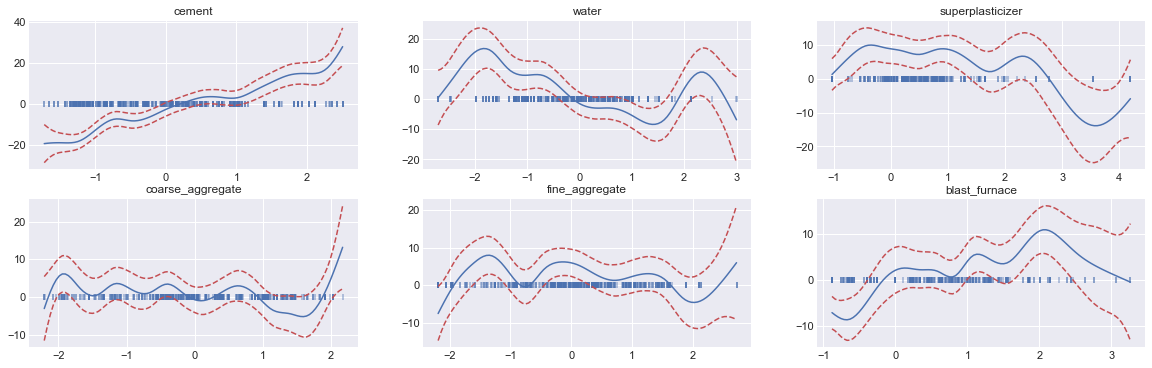

In [32]:
partial_dependence(gam)
gfx.report_metrics(gam, X_test, y_test)


    Test R2: 0.5074053051093821
    Test MSE: 138.97637744744222
    Test Median Absolute Error: 7.958118734483843


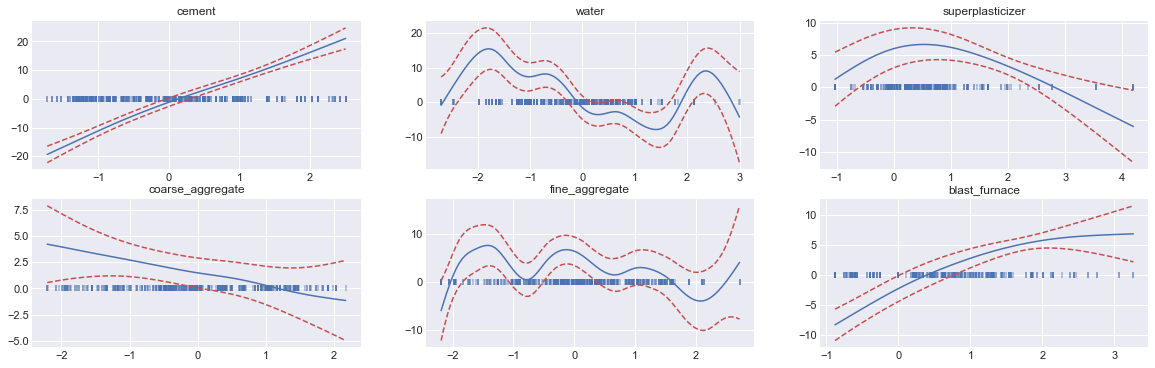

In [33]:
partial_dependence(gam_2)
gfx.report_metrics(gam_2, X_test, y_test)
